# Template molecules implemented by insane.py 
### comparing the 3D structure vs the documented schematic

Insane.py is a script that generates a coarse grained complex lipid bilayer, from a list of lipid species for the upper and lower leaf of the membrane, and the probabilities of their expression.  The script uses one of several generic templates of cartesian coordinates for glycolipids, then maps a coarse grained bead configuration for each specific lipid onto that template.

There is an apparent issue with two lipid species (PAP2 and PAP3) in a complex neuronal cell membrane. The structure of the generated molecule for these species prevents the model approaching energy minimization.

The following suggests that there may be a problem with any species developed from the advanced (longer/branched/glycosil and ceramide based) glycolipid template which is used to generate the following species in the complex neuronal membrane.

species | Upper leaf frequency | Lower leaf frequency
---|---|---
POP1 | 0.0 | 0.002
POP2 | 0.0 | 0.002
POP3 | 0.0 | 0.002
PAP1 | 0.0 | 0.003
PAP2 | 0.0 | 0.003
PAP3 | 0.0 | 0.003
POPI | 0.0 | 0.013
PAPI | 0.0 | 0.013
PUPI | 0.0 | 0.02
PIPI | 0.0 | 0.005
DPG1 | 0.009| 0.0 
DBG1 | 0.002 | 0.0
PNG1 | 0.002 | 0.0
POG1 | 0.001 | 0.0
DPG3 | 0.009 | 0.0
DBG3 | 0.002 | 0.0
PNG3 | 0.002 | 0.0

--- 

#### utility classes

*Molecule:*  class to graph template structures using the x,y,z cordinate system extracted from insane.py, a list of bonded atom pair tuples hand generated from the topology schematic appearing as a comment in the insane.py script. Then to map a specific lipid structure onto that template.

In [1]:
#default visualization is inline (select notebook for interractivity)
%matplotlib notebook

# global objects from insane.py so we can cut and paste in code from that script
lipidsx={}
lipidsy={}
lipidsz={}

class molecule:
    def __init__(self,title,x,y,z):
        self.x=x
        self.y=y
        self.z=z
        self.bonds=None
        self.title=title
    def chart(self):
        import mpl_toolkits
        from mpl_toolkits.mplot3d import Axes3D
        import matplotlib.pyplot as plt

        fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
        ax = fig.add_subplot(111, projection='3d')

        def lowerbound(values):
            minimum = min(values)
            if minimum==max(values): # the model has no dimension in this axis
                minimum = minimum - 0.5;
            return minimum-0.2

        def upperbound(values):
            maximum = max(values)
            if maximum==min(values): # the model has no dimension in this axis
                maximum = maximum + 0.5;
            return maximum+0.2
            
        plt.xlim(lowerbound(self.x), upperbound(self.x))
        plt.ylim(lowerbound(self.y), upperbound(self.y))
        ax.set_zlim(lowerbound(self.z), upperbound(self.z))

        ax.scatter(self.x,self.y,self.z,color='b')
    
        for i in range(len(self.x)): 
            ax.text(self.x[i],self.y[i],self.z[i],'  {0}'.format(i+1), size=16 )
        
        if self.bonds:
            for a,b in self.bonds:
                ax.plot3D((self.x[a-1],self.x[b-1]),(self.y[a-1],self.y[b-1]),(self.z[a-1],self.z[b-1]), color='r')
        plt.axis('off')
        
        ax.view_init(30, 45)
        
        ax.set_xlabel('$X$',color='green')
        ax.set_ylabel('$Y$',color='green')
        ax.zaxis.set_rotate_label(False) 
        ax.set_zlabel('$Z$',rotation=0,color='green')
        plt.title("template[{}]".format(self.title), size=24)
    
        plt.show()
    def chartInstance(self, title, instance):
        from mpl_toolkits.mplot3d import Axes3D
        import matplotlib.pyplot as plt
        
        assert len(instance)>0, 'instance instance is empty' 
        assert len(instance)<=len(self.x), 'instance instance is longer {} than the x coordinate list {}'.format(len(instance), len(self.x)) 
        assert len(instance)<=len(self.y), 'instance instance is longer {} than the y coordinate list {}'.format(len(instance), len(self.x))  
        assert len(instance)<=len(self.z), 'instance instance is longer {} than the z coordinate list {}'.format(len(instance), len(self.x))  


        fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
        ax = fig.add_subplot(111, projection='3d')

        
        #build list of cartesian coordinates and labels
        x = []
        y = []
        z = []
        names = []
        for i in range(len(instance)):
            instanceBead = instance[i]
            if instanceBead != '-': 
                x.append(self.x[i])
                y.append(self.y[i])
                z.append(self.z[i])
                names.append(instanceBead)
        
        def lowerbound(values):
            minimum = min(values)
            if minimum==max(values): # the model has no dimension in this axis
                minimum = minimum - 0.5;
            return minimum-0.2

        def upperbound(values):
            maximum = max(values)
            if maximum==min(values): # the model has no dimension in this axis
                maximum = maximum + 0.5;
            return maximum+0.2
            
        plt.xlim(lowerbound(x), upperbound(x))
        plt.ylim(lowerbound(y), upperbound(y))
        ax.set_zlim(lowerbound(z), upperbound(z))
        
        for i in range(len(names)): 
            ax.scatter(x[i],y[i],z[i],color='b')
            ax.text(x[i],y[i]+0.05,z[i],names[i], size=16 )

        if self.bonds:
            for a,b in self.bonds:
                if (instance[a-1] != '-') and (instance[b-1] != '-'):
                    ax.plot3D((self.x[a-1],self.x[b-1]),(self.y[a-1],self.y[b-1]),(self.z[a-1],self.z[b-1]), color='r')
        
        plt.axis('off')
        ax.view_init(30, 45)
        
        ax.set_xlabel('$X$',color='green')
        ax.set_ylabel('$Y$',color='green')
        ax.zaxis.set_rotate_label(False) 
        ax.set_zlabel('$Z$',rotation=0,color='green')
        plt.title("{}[{}]".format(title,self.title), size=24)
    
        plt.show()


---

### 18 bead template for simple di-acyl-glycerols [lipid]
extracted from insane.py version 20131112.22.TAW

Used to establish that the 3D structure of a generic di-acyl-glycerol maps closely to the topology schematic from the comments

<IPython.core.display.Javascript object>


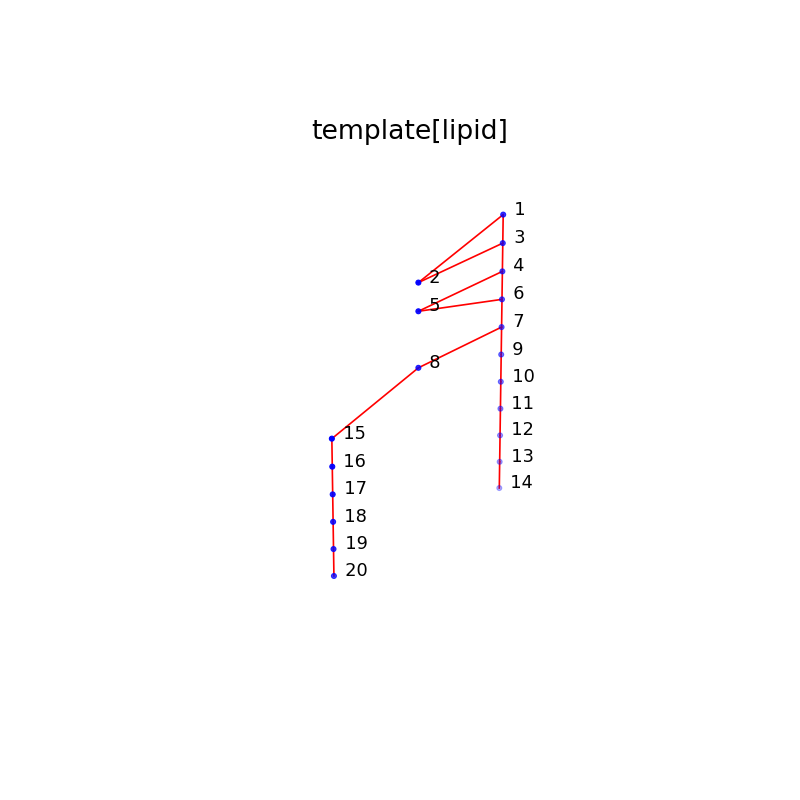

In [4]:
# cut and paste from insane.py version 20131112.22.TAW 
moltype = "lipid"
lipidsx[moltype] = (    0, .5,  0,  0, .5,  0,  0, .5,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1)
lipidsy[moltype] = (    0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0)
lipidsz[moltype] = (   10,  9,  9,  8,  8,  7,  6,  6,  5,  4,  3,  2,  1,  0,  5,  4,  3,  2,  1,  0)
#                       1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 

lipid = molecule('lipid',lipidsx[moltype],lipidsy[moltype],lipidsz[moltype])
# Bond pairings based on the schematic topology
lipid.bonds = ((1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(4,6),(6,7),(7,8),(7,9),(9,10),(10,11),(11,12),(12,13),(13,14),(8,15),(15,16),(16,17),(17,18),(18,19),(19,20));
lipid.chart()


*Schematic topology*
~~~
  1-3-4-6-7--9-10-11-12-13-14
   \| |/  |
    2 5   8-15-16-17-18-19-20
~~~

---


#### Phosphatidylcholine mapped onto the generic glycolipid template


<IPython.core.display.Javascript object>


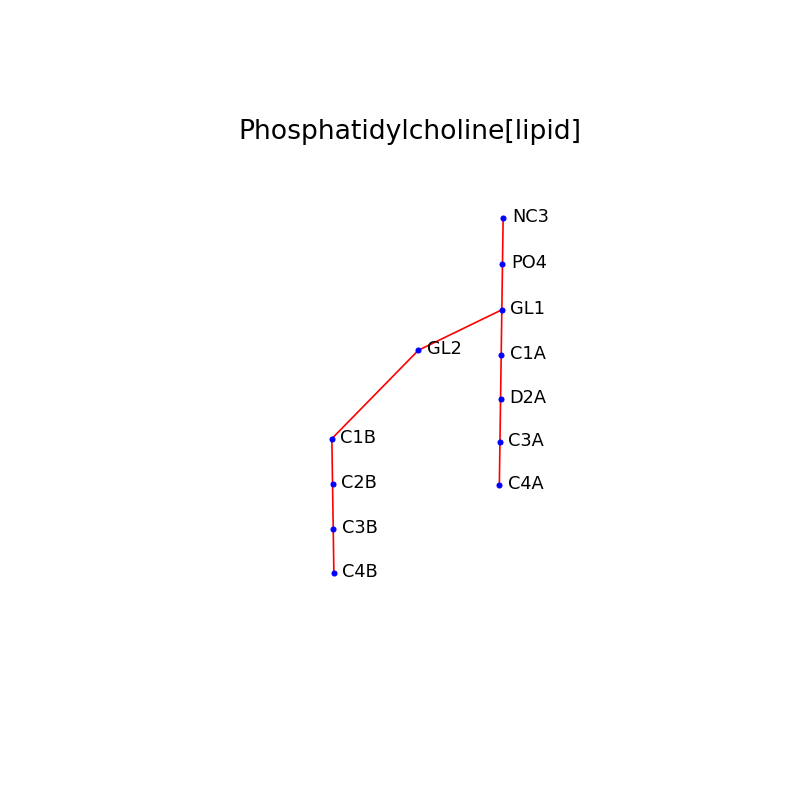

In [5]:
POPC =" -   -   -  NC3  -  PO4 GL1 GL2 C1A D2A C3A C4A  -   -  C1B C2B C3B C4B  -   - ".split()
lipid.chartInstance('Phosphatidylcholine',POPC)

Coarse grained 1-palmitoyl-2-oleoyl Phosphatidylcholine from http://cgmartini.nl/index.php/force-field-parameters/lipids2/351-lipid.html?dir=PC&lipid=POPC
![Coarse grained 1-palmitoyl-2-oleoyl phosphatidylcholine](http://cgmartini.nl/images/parameters/lipids/PC/POPC/POPC-img.png)
Atomistic 1-palmitoyl-2-oleoyl phosphatidylcholine
![atomistic 1-palmitoyl-2-oleoyl phosphatidylcholine](https://upload.wikimedia.org/wikipedia/commons/thumb/a/ac/1-palmitoyl-2-oleoylphosphatidylcholine.svg/450px-1-palmitoyl-2-oleoylphosphatidylcholine.svg.png)

---

### 31 bead template for longer and branched glycosil and ceramide based glycolipids
extracted from insane.py version 20131112.22.TAW

This is the structure that exhibits problems generating PAP2 and PAP3 species but may have structural problems that extend to other species.

<IPython.core.display.Javascript object>


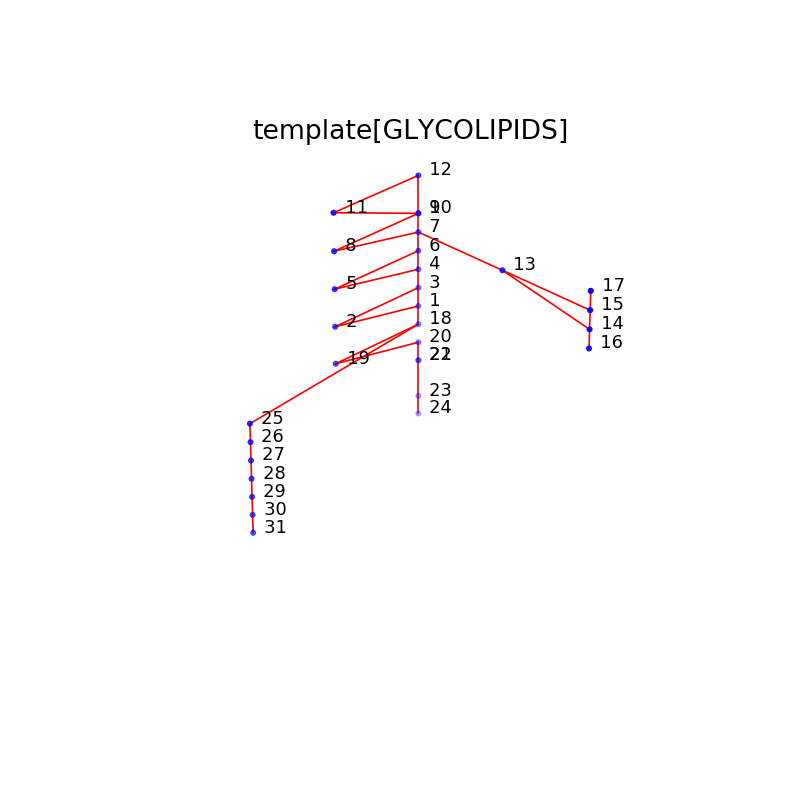

In [6]:
# cut and paste from insane.py version 20131112.22.TAW 
moltype = "GLYCOLIPIDS"
lipidsx[moltype] = (    0,  .5,   0,   0,  .5,  0,  0, .5,  0,    0,   .5,    0,    0,    0,   0,    0,    0,    0,   .5,   0,   0,   0,   0,   0,   1,   1,   1,   1,   1,   1,   1)
lipidsy[moltype] = (    0,   0,   0,   0,   0,  0,  0,  0,  0,    0,    0,    0,   .5,    1,   1,    1,    1,    0,    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0)
lipidsz[moltype] = (    8,   9,   9,  10,  11, 11, 12, 13, 13,   13,   15,   15,   12,   11,  12,   10,   13,    7,    7,   6,   5,   5,   3,   2,   6,   5,   4,   3,   2,   1,   0)
#                       1    2    3    4    5   6   7   8   9    10    11    12    13    14   15    16    17    18    19   20   21   22   23   24   25   26   27   28   29   30   31
glycolipid = molecule('GLYCOLIPIDS',lipidsx[moltype],lipidsy[moltype],lipidsz[moltype])
# Bond pairings based on the schematic topology
glycolipid.bonds = ((1,2),(2,3),(1,3),(3,4),(4,5),(5,6),(4,6),(6,7),(7,8),(8,9),(7,9),(9,10),(10,11),(11,12),(10,12),
                  (7,13),(13,14),(13,15),(14,15),(15,17),(14,16),
                  (1,18),(18,25),(25,26),(26,27),(27,28),(28,29),(29,30),(30,31),
                  (18,19),(19,20),(20,21),(21,22),(22,23),(23,24))
glycolipid.chart()

Topology schematic 

~~~~
     17-15-14-16
         |/
        13
         |
 12-10-9-7-6-4-3-1--18--25-26-27-28-29-30-31
  |/   |/  |/  |/    |
  11   8   5   2    19--20-21-22-23-24
~~~~

NB: the 3D representation using the cartesian coordinates from insane.py colocates bead #10 with bead #9, and colocates bead #21 and bead #22, it also adds a twist in the two acyl chain so beads #20- #24 swap x value with beads #25- #31.

---

Generating an instance of that template using the values for POP3 (C16:0/C18:1 Phosphatidylinositol)

<IPython.core.display.Javascript object>


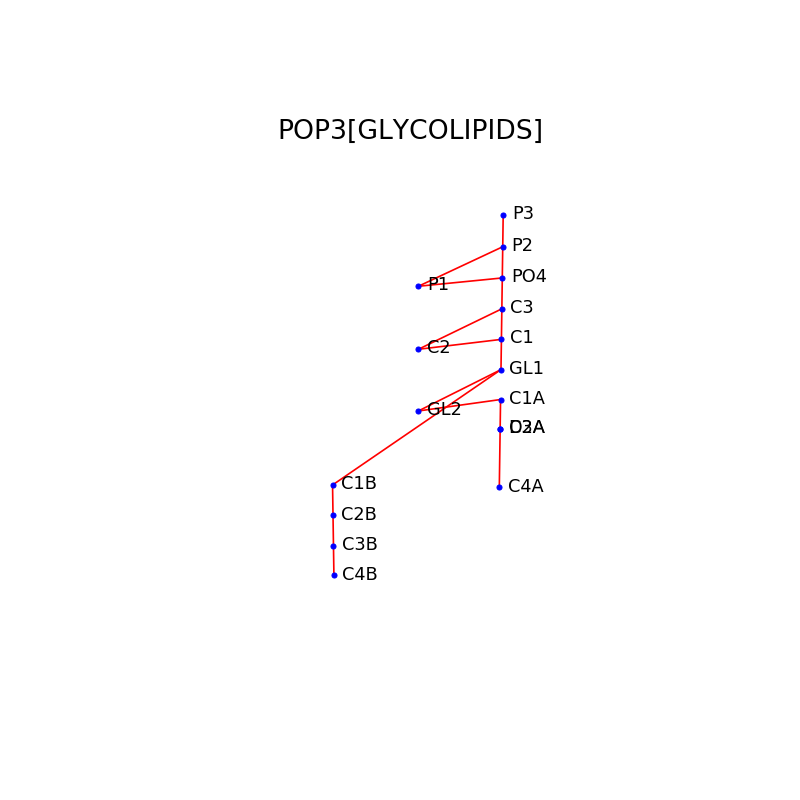

<IPython.core.display.Javascript object>


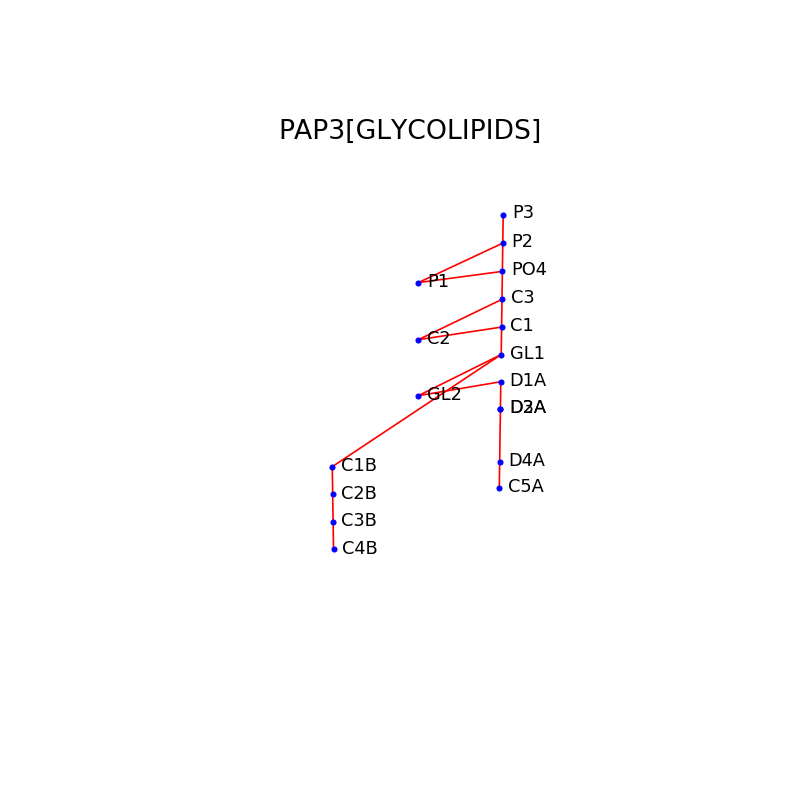

In [7]:
POP3 = " C1   C2   C3  PO4   P1  P2  P3   -   -     -     -     -     -     -    -     -     -   GL1   GL2  C1A  D2A  C3A  C4A   -   C1B  C2B  C3B  C4B   -    -    - ".split()
glycolipid.chartInstance('POP3',POP3)

PAP3 = " C1   C2   C3  PO4   P1  P2  P3   -   -     -     -     -     -     -    -     -     -   GL1   GL2  D1A  D2A  D3A  D4A  C5A  C1B  C2B  C3B  C4B   -     -    -".split()
glycolipid.chartInstance('PAP3',PAP3)

The problem is that the schematic representation of the acyl tails does not agree with the actual structure of POP3, and the co-location of beads D2A and C3A

Coarse grained 1-palmitoyl-2-oleoyl Phosphatidylinositol from http://cgmartini.nl/index.php/force-field-parameters/lipids2/351-lipid.html?dir=Phosphatidylinositols&lipid=POP3
![Coarse grained 1-palmitoyl-2-oleoyl Phosphatidylinositol ](http://cgmartini.nl/images/parameters/lipids/Phosphatidylinositols/POP3/POP3-img.png)
Atomistic 1-palmitoyl-2-arachidonoyl phosphatidylinositol
![atomistic 1-palmitoyl-2-arachidonoyl phosphatidylcholine](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f0/Phosphatidylinositol-3%2C4%2C5-trisphosphate.svg/330px-Phosphatidylinositol-3%2C4%2C5-trisphosphate.svg.png)

---
### Glycolipids from insane.py version 20131112.22.TAW (modified)
Modified by Richard Morris to conform to the topology schematic, namely to move bead #10 away from #9, and bead 22 away from #21, and to untwist the acyl chains  

<IPython.core.display.Javascript object>


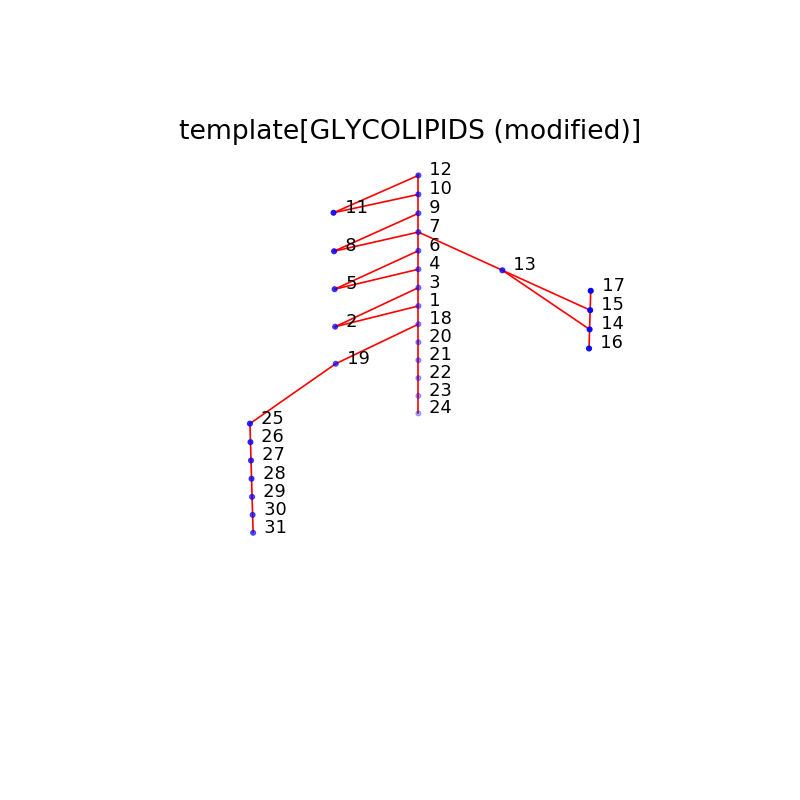

In [8]:
# cut and paste from insane.py version 20131112.22.TAW with modifications by Richard Morris
moltype = "GLYCOLIPIDS (modified)"

lipidsx[moltype]= [    0,  .5,   0,   0,  .5,  0,  0, .5,  0,    0,   .5,    0,    0,    0,   0,    0,    0,    0,   .5,   0,   0,   0,   0,   0,   1,   1,   1,   1,   1,   1,   1]
lipidsy[moltype]= [    0,   0,   0,   0,   0,  0,  0,  0,  0,    0,    0,    0,   .5,    1,   1,    1,    1,    0,    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]
lipidsz[moltype]= [    8,   9,   9,  10,  11, 11, 12, 13, 13,   14,   15,   15,   12,   11,  12,   10,   13,    7,    7,   6,   5,   4,   3,   2,   6,   5,   4,   3,   2,   1,   0]
#                      1    2    3    4    5   6   7   8   9    10    11    12    13    14   15    16    17    18    19   20   21   22   23   24   25   26   27   28   29   30   31
glycolipidfixed = molecule(moltype,lipidsx[moltype],lipidsy[moltype],lipidsz[moltype])
glycolipidfixed.bonds = ((1,2),(2,3),(1,3),(3,4),(4,5),(5,6),(4,6),(6,7),(7,8),(8,9),(7,9),(9,10),(10,11),(11,12),(10,12),
                  (7,13),(13,14),(13,15),(14,15),(15,17),(14,16),
                  (1,18),(18,20),(20,21),(21,22),(22,23),(23,24),
                  (18,19),(19,25),(25,26),(26,27),(27,28),(28,29),(29,30),(30,31))
glycolipidfixed.chart()





Topology schematic 
~~~
     17-15-14-16
         |/
        13
         |
 12-10-9-7-6-4-3-1--18--20-21-22-23-24
  |/   |/  |/  |/    |
  11   8   5   2    19--25-26-27-28-29-30-31
~~~

---

<IPython.core.display.Javascript object>


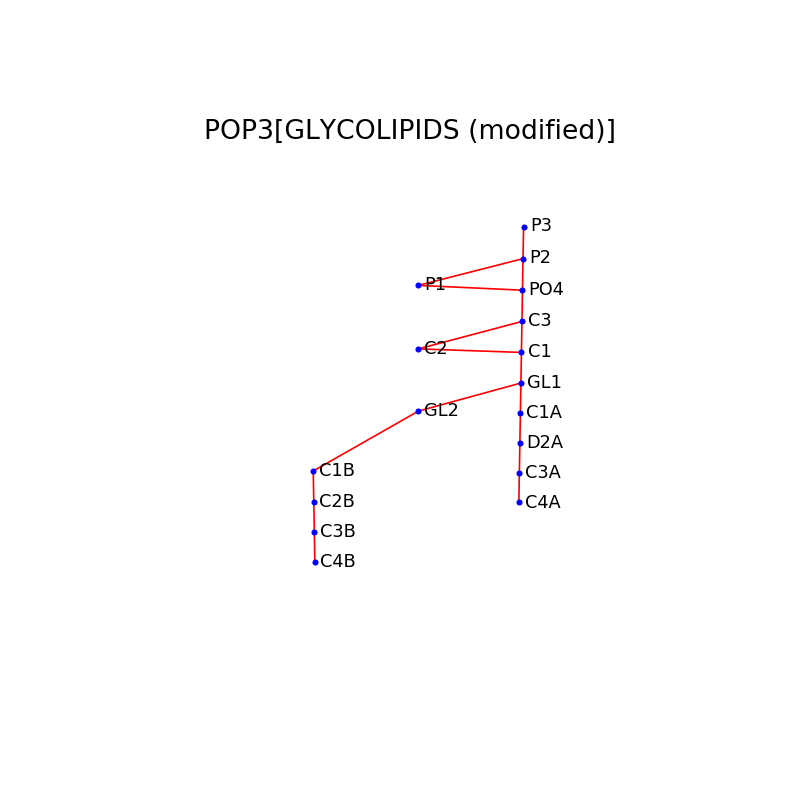

<IPython.core.display.Javascript object>


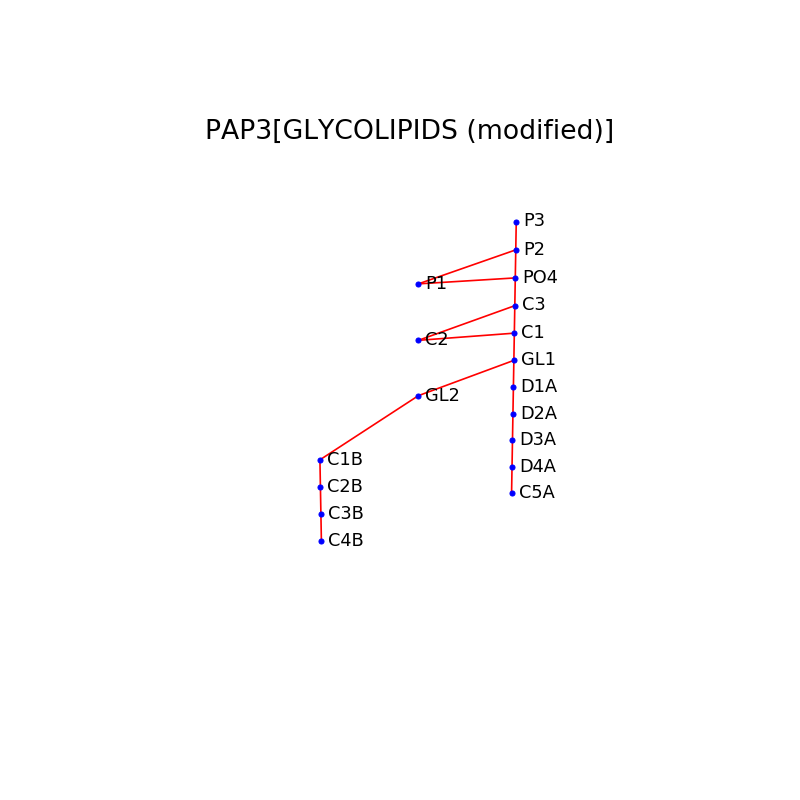

In [9]:
POP3 = " C1   C2   C3  PO4   P1  P2  P3   -   -     -     -     -     -     -    -     -     -   GL1   GL2  C1A  D2A  C3A  C4A   -   C1B  C2B  C3B  C4B   -    -    - ".split()
glycolipidfixed.chartInstance('POP3',POP3)

PAP3 = " C1   C2   C3  PO4   P1  P2  P3   -   -     -     -     -     -     -    -     -     -   GL1   GL2  D1A  D2A  D3A  D4A  C5A  C1B  C2B  C3B  C4B   -     -    -".split()
glycolipidfixed.chartInstance('PAP3',PAP3)


# Glycolipids from the latest version of  insane.py 20140603.11.TAW

http://www.cgmartini.nl/images/tools/insane/insane.py

By comparison this is a shorter 24 bead version of a glycolipid template in the latest implementation of insane.py 

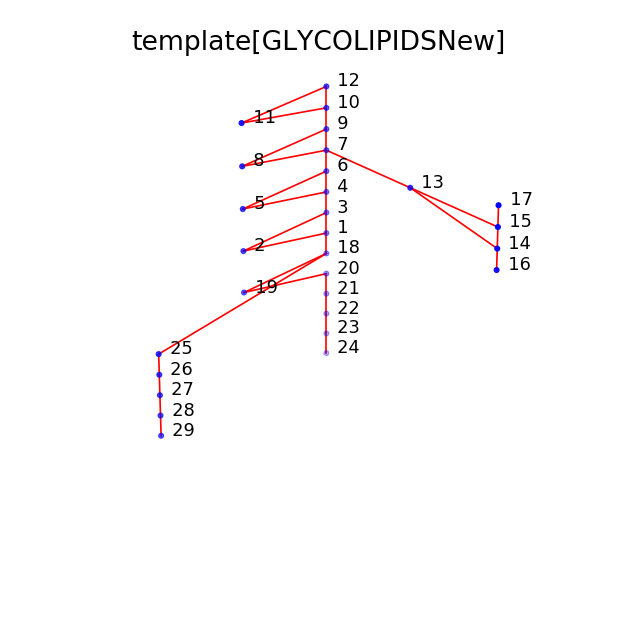

In [99]:
# cut and paste from insane.py version 20140603.11.TAW
moltype = "GLYCOLIPIDSNew"

lipidsx[moltype] = (    0,  .5,   0,   0,  .5,  0,  0, .5,  0,    0,   .5,    0,    0,    0,   0,    0,    0,    0,   .5,   0,   0,   0,   0,   0,   1,   1,   1,   1,   1)
lipidsy[moltype] = (    0,   0,   0,   0,   0,  0,  0,  0,  0,    0,    0,    0,   .5,    1,   1,    1,    1,    0,    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0)
lipidsz[moltype] = (    6,   7,   7,   8,   9,  9, 10, 11, 11,   12,   13,   13,   10,    9,  10,    8,   11,    5,    5,   4,   3,   2,   1,   0,   4,   3,   2,   1,   0)
#                       1    2    3    4    5   6   7   8   9    10    11    12    13    14   15    16    17    18    19   20   21   22   23   24   25   26   27   28   29   30   31
glycolipidnew = molecule('GLYCOLIPIDSNew',lipidsx[moltype],lipidsy[moltype],lipidsz[moltype])
glycolipidnew.bonds = ((1,2),(2,3),(1,3),(3,4),(4,5),(5,6),(4,6),(6,7),(7,8),(8,9),(7,9),(9,10),(10,11),(11,12),(10,12),(7,13),(13,14),(13,15),(14,15),(15,17),(14,16),(1,18),(18,25),(25,26),(26,27),(27,28),(28,29),(18,19),(19,20),(20,21),(21,22),(22,23),(23,24))
glycolipidnew.chart()

Topology schematic 
~~~
     17-15-14-16
         |/
        13
         |
 12-10-9-7-6-4-3-1--18--25-26-27-28-29
  |/   |/  |/  |/    |
  11   8   5   2    19--20-21-22-23-24
~~~

NB: the latest insane.py script fixes the colocation of beads #10.#11 and $21,#22 but the twist in the acyl chain is still evident

---

# Glycolipids when the alpha acyl tail comprises C20:4 (arachidonyl)


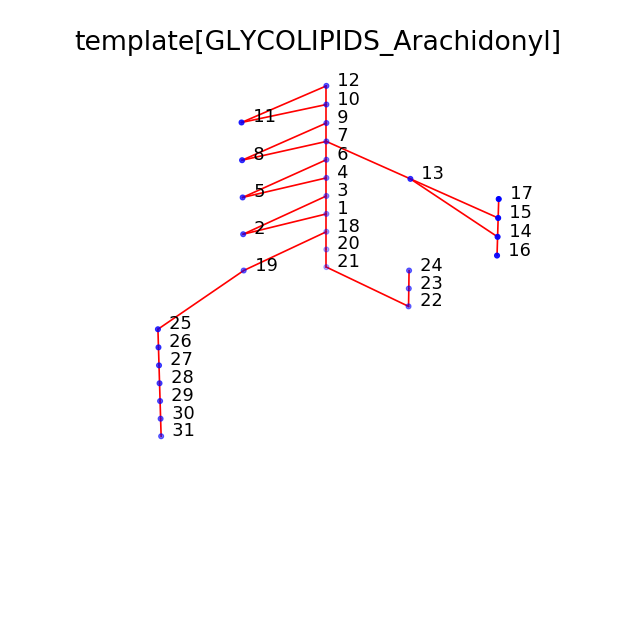

In [100]:
# cut and paste from insane.py version 20140603.11.TAW
moltype = "GLYCOLIPIDS_Arachidonyl"

lipidsx[moltype]= [    0,  .5,   0,   0,  .5,  0,  0, .5,  0,    0,   .5,    0,    0,    0,   0,    0,    0,    0,   .5,   0,   0,   0,   0,   0,   1,   1,   1,   1,   1,   1,   1]
lipidsy[moltype]= [    0,   0,   0,   0,   0,  0,  0,  0,  0,    0,    0,    0,   .5,    1,   1,    1,    1,    0,    0,   0,   0,  .5,  .5,  .5,   0,   0,   0,   0,   0,   0,   0]
lipidsz[moltype]= [    8,   9,   9,  10,  11, 11, 12, 13, 13,   14,   15,   15,   12,   11,  12,   10,   13,    7,    7,   6,   5,   5,   6,   7,   6,   5,   4,   3,   2,   1,   0]
#                      1    2    3    4    5   6   7   8   9    10    11    12    13    14   15    16    17    18    19   20   21   22   23   24   25   26   27   28   29   30   31
glycolipidarachidonyl = molecule(moltype,lipidsx[moltype],lipidsy[moltype],lipidsz[moltype])
glycolipidarachidonyl.bonds = ((1,2),(2,3),(1,3),(3,4),(4,5),(5,6),(4,6),(6,7),(7,8),(8,9),(7,9),(9,10),(10,11),(11,12),(10,12),(7,13),(13,14),(13,15),(14,15),(15,17),(14,16),(1,18),(18,20),(20,21),(21,22),(22,23),(23,24),(18,19),(19,25),(25,26),(26,27),(27,28),(28,29),(29,30),(30,31))
glycolipidarachidonyl.chart()

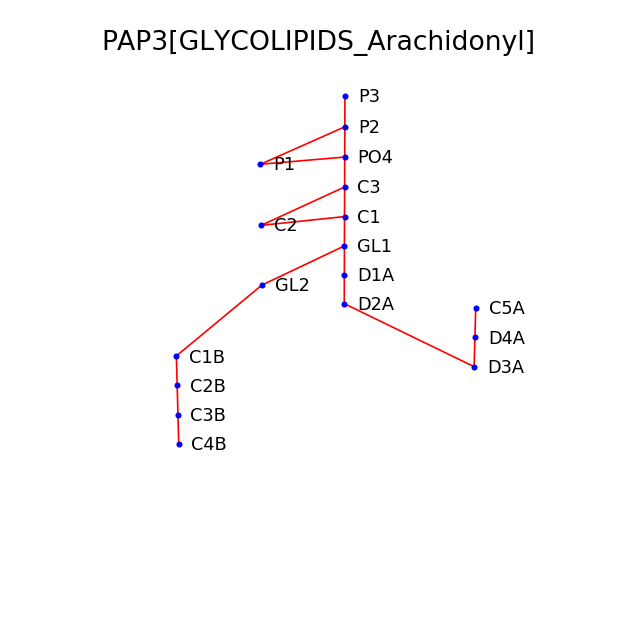

In [101]:
PAP3 = " C1   C2   C3  PO4   P1  P2  P3   -   -     -     -     -     -     -    -     -     -   GL1   GL2  D1A  D2A  D3A  D4A  C5A  C1B  C2B  C3B  C4B   -     -    -".split()
glycolipidarachidonyl.chartInstance('PAP3',PAP3)


Topology schematic 
~~~
     17-15-14-16
         |/
        13           24-23-22 
         |                  | 
 12-10-9-7-6-4-3-1--18--20-21
  |/   |/  |/  |/    |
  11   8   5   2    19--25-26-27-28-29
~~~

---